link to medium post: https://medium.com/@zhiwei_zhang/fashion-mnist-with-keras-ed1e7b0ac8d2

In [36]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Data Preprocess


In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("training data shape", x_train.shape)
print("tesing data shape",x_test.shape)

training data shape (60000, 28, 28)
tesing data shape (10000, 28, 28)


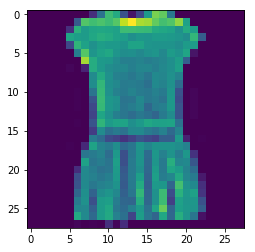

In [39]:
plt.imshow(x_train[3, :].reshape((28, 28)))

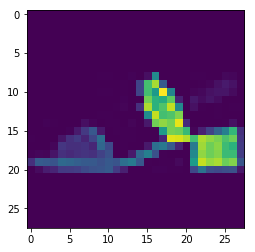

In [40]:
plt.imshow(x_train[230, :].reshape((28, 28)))

### Train and validation set split

In [41]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
data_input = x_train[indices]
labels = y_train[indices]

sample_size = 60000-int(60000*0.01)
x_train = data_input[:sample_size]
y_train = labels[:sample_size]
x_vali = data_input[sample_size:60000]
y_vali = labels[sample_size: 60000]

### reshape input data

In [42]:
img_rows, img_cols = 28, 28
# 1 channel (grayscale, 3 in the case of color, 1 each for Red, Green and Blue)
input_shape = (img_rows, img_cols, 1)   

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_vali = x_vali.reshape(x_vali.shape[0], img_rows, img_cols, 1)

print("reshaped training data shape", x_train.shape)
print("reshaped tesing data shape",x_test.shape)

reshaped training data shape (59400, 28, 28, 1)
reshaped tesing data shape (10000, 28, 28, 1)


# Build CNN Models

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras

### one - layer model

In [44]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(loss='categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                346176    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [45]:
batch_size = 512
num_classes = 10
epochs = 50

history = model_1.fit(x_train, y_train, batch_size = batch_size,
        epochs=epochs, verbose=1,validation_data=(x_vali, y_vali))

Train on 59400 samples, validate on 600 samples
Epoch 1/50
59400/59400 [==============================] - 23s 380us/step - loss: 0.6409 - acc: 0.7858 - val_loss: 0.4294 - val_acc: 0.8433
Epoch 2/50
59400/59400 [==============================] - 23s 382us/step - loss: 0.4010 - acc: 0.8595 - val_loss: 0.4212 - val_acc: 0.8350
Epoch 3/50
59400/59400 [==============================] - 22s 374us/step - loss: 0.3482 - acc: 0.8774 - val_loss: 0.3081 - val_acc: 0.8883
Epoch 4/50
59400/59400 [==============================] - 24s 398us/step - loss: 0.3150 - acc: 0.8890 - val_loss: 0.3071 - val_acc: 0.8750
Epoch 5/50
59400/59400 [==============================] - 24s 401us/step - loss: 0.2984 - acc: 0.8944 - val_loss: 0.2680 - val_acc: 0.9017
Epoch 6/50
59400/59400 [==============================] - 25s 422us/step - loss: 0.2804 - acc: 0.9009 - val_loss: 0.2651 - val_acc: 0.8983
Epoch 7/50
59400/59400 [==============================] - 22s 367us/step - loss: 0.2739 - acc: 0.9025 - val_loss: 0.30

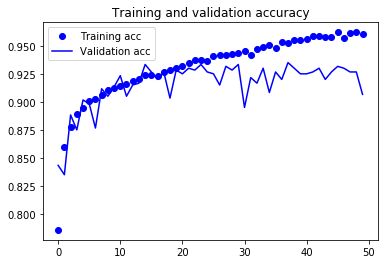

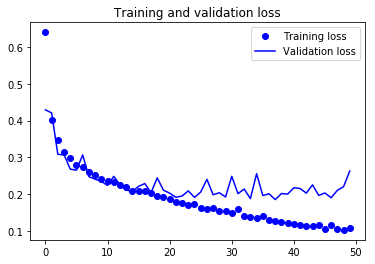

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### test accuracy -- 0.9049

In [47]:
model_1.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 149us/step


[0.2981989410698414, 0.9049]

###  Three - layer model

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [17]:
history= model.fit(x_train, y_train, batch_size = batch_size,
        epochs=epochs, verbose=1,validation_data=(x_vali, y_vali))

Train on 59400 samples, validate on 600 samples
Epoch 1/50
59400/59400 [==============================] - 54s 908us/step - loss: 0.7862 - acc: 0.7083 - val_loss: 0.5315 - val_acc: 0.8183
Epoch 2/50
59400/59400 [==============================] - 53s 892us/step - loss: 0.4904 - acc: 0.8189 - val_loss: 0.4311 - val_acc: 0.8267
Epoch 3/50
59400/59400 [==============================] - 53s 885us/step - loss: 0.4239 - acc: 0.8435 - val_loss: 0.3692 - val_acc: 0.8683
Epoch 4/50
59400/59400 [==============================] - 58s 977us/step - loss: 0.3860 - acc: 0.8589 - val_loss: 0.3273 - val_acc: 0.8667
Epoch 5/50
59400/59400 [==============================] - 60s 1ms/step - loss: 0.3650 - acc: 0.8652 - val_loss: 0.3683 - val_acc: 0.8367
Epoch 6/50
59400/59400 [==============================] - 55s 929us/step - loss: 0.3486 - acc: 0.8707 - val_loss: 0.3094 - val_acc: 0.8817
Epoch 7/50
59400/59400 [==============================] - 55s 926us/step - loss: 0.3289 - acc: 0.8780 - val_loss: 0.2705

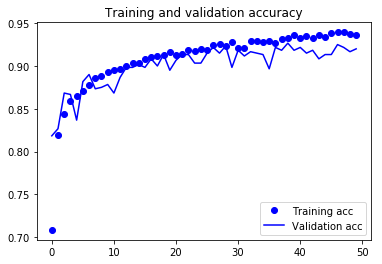

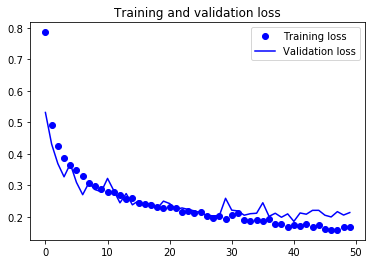

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 338us/step


[0.21967999415397643, 0.9237]

 Validation accuracy fluctuated a lot in 1-layer model 
 
 3-layer CNN model gives test accuracy 92.37% compared to  90.49% from 1-layer model.